****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
******************

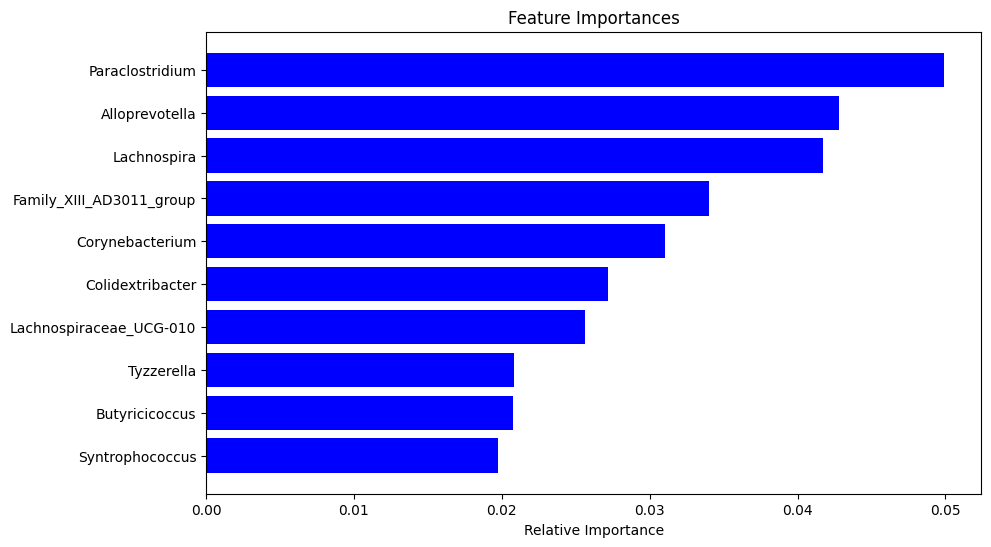

****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Control
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Obesity
Patient 10 is predicted to have: Obesity
Patient 11 is predicted to have: Control
Patient 12 is predicted to have: Control
Patient 13 is predicted to have: Obesity
Patient 14 is predicted to have: Control
Patient 15 is predicted to have: Control
Patient 16 is predicted to have: Control
Patient 17 is predicted to have: Control
Patient 18 is predicted to have: Control
Patient 19 is predicted to have: Control
Patient 20 is predicted to have: Control
Patient 21 is predicted to have: Control
Patient 22 is predicted to have: Control
Patien

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Best parameters from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Feature importance
importance = best_xgb.feature_importances_
indices = np.argsort(importance)[-10:]

# Print the 10 most important features
print("Top 10 important features:")
for i in indices:
    print(f"{X.columns[i]}: {importance[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
*****************

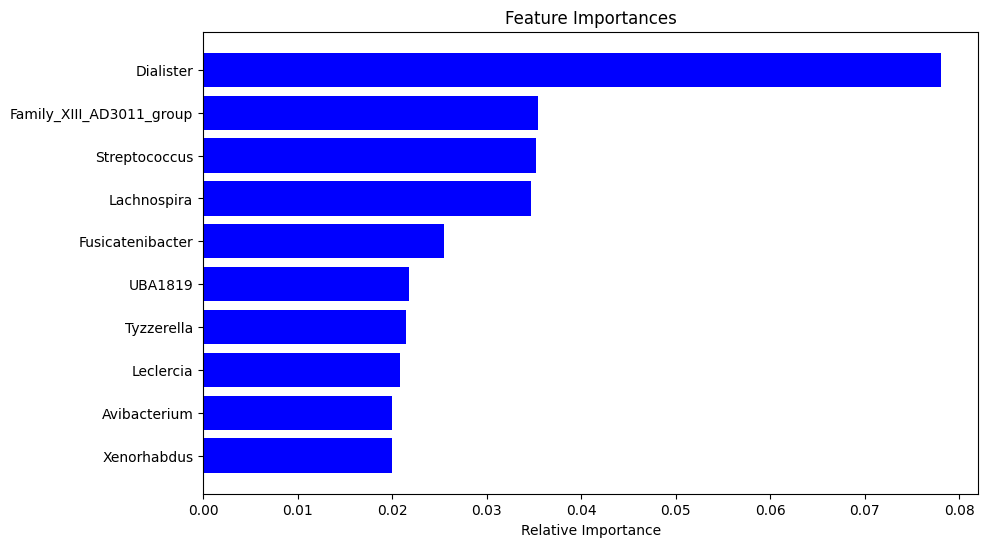

****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Control
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Obesity
Patient 10 is predicted to have: Obesity
Patient 11 is predicted to have: Control
Patient 12 is predicted to have: Control
Patient 13 is predicted to have: Obesity
Patient 14 is predicted to have: Control
Patient 15 is predicted to have: Control
Patient 16 is predicted to have: Control
Patient 17 is predicted to have: Control
Patient 18 is predicted to have: Control
Patient 19 is predicted to have: Control
Patient 20 is predicted to have: Control
Patient 21 is predicted to have: Control
Patient 22 is predicted to have: Control
Patien

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Feature importance
importance = best_xgb.feature_importances_
indices = np.argsort(importance)[-10:]

# Print the 10 most important features
print("Top 10 important features:")
for i in indices:
    print(f"{X.columns[i]}: {importance[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


****************************************************************************************************
Best parameters :  <catboost.core.CatBoostClassifier object at 0x00000237675C4EF0>
****************************************************************************************************
****************************************************************************************************
CatBoost Cross-validation scores: [0.72  0.735 0.755 0.775 0.69 ]
Average CatBoost Cross-validation score: 0.735
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

     Control       0.72      0.36      0.48        87
     Obesity       0.72      0.91      0.81       160
         T2D       0.67      1.00      0.80         4

    accuracy                           0.72       251
   macro avg       0.70    

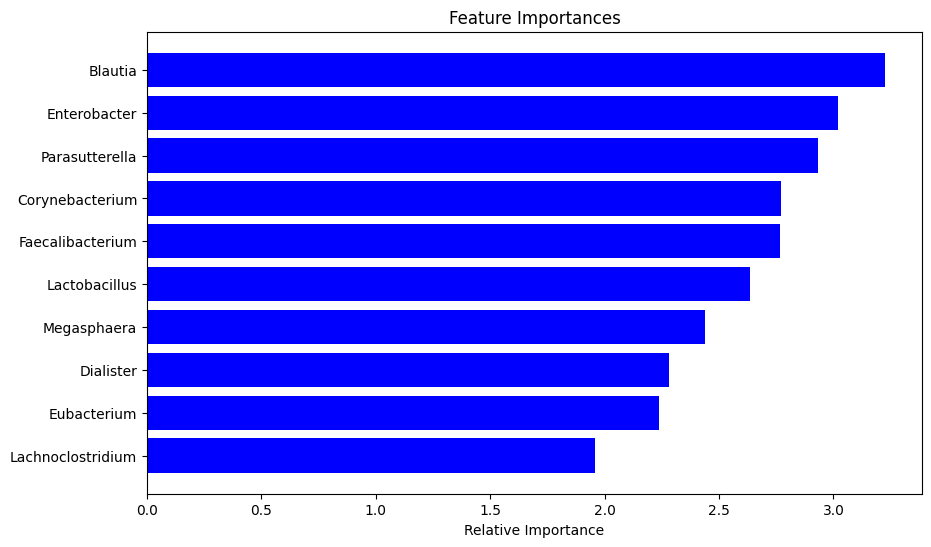

****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Control
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Obesity
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Obesity
Patient 10 is predicted to have: Obesity
Patient 11 is predicted to have: Control
Patient 12 is predicted to have: Control
Patient 13 is predicted to have: Obesity
Patient 14 is predicted to have: Control
Patient 15 is predicted to have: Control
Patient 16 is predicted to have: Control
Patient 17 is predicted to have: Control
Patient 18 is predicted to have: Control
Patient 19 is predicted to have: Control
Patient 20 is predicted to have: Control
Patient 21 is predicted to have: Control
Patient 22 is predicted to have: Control
Patien

C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1]:
# Install catboost
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a CatBoostClassifier with hyperparameter tuning
catboost = CatBoostClassifier(random_state=42, verbose=0, bootstrap_type='Bernoulli')
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0]
}

grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_catboost.fit(X_train_scaled, y_train_encoded)

# Best parameters from GridSearchCV
best_catboost = grid_search_catboost.best_estimator_
print("*" * 100)
print("Best parameters : ", best_catboost)
print("*" * 100)

# Cross-validation scores for CatBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_catboost = cross_val_score(best_catboost, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'CatBoost Cross-validation scores: {cv_scores_catboost}')
print(f'Average CatBoost Cross-validation score: {np.mean(cv_scores_catboost)}')
print("*" * 100)

# Train the model with the best parameters
best_catboost.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_catboost = best_catboost.predict(X_test_scaled)

print("*" * 100)
# Evaluate the CatBoost model
print(classification_report(y_test_encoded, y_pred_catboost, target_names=le.classes_))
print("*" * 100)

# Feature importance
importance = best_catboost.feature_importances_
indices = np.argsort(importance)[-10:]

# Print the 10 most important features
print("Top 10 important features:")
for i in indices:
    print(f"{X.columns[i]}: {importance[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_catboost.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_catboost.predict_proba(new_patient_scaled)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


In [3]:
# Lists of unique microbes for each disease category
unique_control_microbes = {'Syntrophococcus', 'Pelistega', 'Corynebacterium'}
unique_obesity_microbes = {'Prevotellaceae_UCG-003', 'Dechloromonas', 'Sphingobacterium', 'Erysipelotrichaceae_UCG-003', 'Leuconostoc', 'Negativicoccus', 'Thiomicrospira', 'Alicycliphilus'}
unique_t2d_microbes = {'dgA-11_gut_group', 'Family_XIII_AD3011_group', 'Chloroplast', 'Stenotrophomonas', 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Lachnospira', 'Tatumella', 'Intestinimonas', 'Ferrimonas', 'CAG-873'}

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_catboost.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Predict the probabilities for each new patient
new_patient_probs = best_catboost.predict_proba(new_patient_scaled)

# Print the predicted disease, unique microbes check, and probabilities for each new patient
for i, (disease, probs) in enumerate(zip(new_patient_diseases, new_patient_probs)):
    print(f"Patient {i+1} is predicted to have: {disease}")
    
    # Check for the presence of unique microbes
    patient_data = new_patient_data.iloc[i]
    if disease == 'Control':
        present_microbes = unique_control_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'Obesity':
        present_microbes = unique_obesity_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'T2D':
        present_microbes = unique_t2d_microbes.intersection(patient_data.index[(patient_data > 0)])
    
    # Determine correctness
    if len(present_microbes) == len(eval(f'unique_{disease.lower()}_microbes')):
        correctness = 'Correct'
    elif len(present_microbes) > 0:
        correctness = 'Partially Correct'
    else:
        correctness = 'Incorrect'
    
    print(f"Unique microbes present in Patient {i+1} for {disease}: {present_microbes}")
    print(f"Microbe presence check: {correctness}")
    
    # Print probabilities of each disease for the patient
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease_name, prob in disease_probabilities.items():
        print(f"{disease_name}: {prob:.2f}")
    
    print("*" * 100)

Patient 1 is predicted to have: Control
Unique microbes present in Patient 1 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 1:
Control: 0.75
Obesity: 0.08
T2D: 0.17
****************************************************************************************************
Patient 2 is predicted to have: Control
Unique microbes present in Patient 2 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 2:
Control: 0.79
Obesity: 0.21
T2D: 0.00
****************************************************************************************************
Patient 3 is predicted to have: Control
Unique microbes present in Patient 3 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 3:
Control: 0.80
Obesity: 0.20
T2D: 0.00
****************************************************************************************************
Patient 4 is predicted to have: Control
Unique microbes pr

C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
import pandas as pd

# Load the Excel file
data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Ensure the data is loaded correctly
print(data.head())

# Identify the column with disease labels
disease_column = 'Disease'  # Update this with the actual column name if different

# Initialize dictionaries to store unique microbes for each disease
unique_microbes = {}

# Loop through each unique disease category
for disease in data[disease_column].unique():
    # Get data for the current disease
    disease_data = data[data[disease_column] == disease]
    
    # Get microbes with non-zero values
    microbes = disease_data.columns[(disease_data != 0).any(axis=0)]
    
    # Store the unique microbes for the current disease
    unique_microbes[disease] = list(microbes)

# Print the unique microbes for each disease
for disease, microbes in unique_microbes.items():
    print(f'Unique microbes in {disease}:')
    print(microbes)
    print()


   Acetanaerobacterium  Acidaminococcus  Acinetobacter  Actinobacillus  \
0             0.000000         0.000138            0.0        0.000553   
1             0.000000         0.054516            0.0        0.000000   
2             0.000000         0.000000            0.0        0.000000   
3             0.000157         0.000000            0.0        0.000000   
4             0.000000         0.000000            0.0        0.000000   

   Aerococcus  Aeromonas  Agathobacter  Aggregatibacter  Akkermansia  \
0         0.0        0.0           0.0         0.000000          0.0   
1         0.0        0.0           0.0         0.000000          0.0   
2         0.0        0.0           0.0         0.000000          0.0   
3         0.0        0.0           0.0         0.000157          0.0   
4         0.0        0.0           0.0         0.000000          0.0   

   Alicycliphilus  ...  UCG-010  Uruburuella  Veillonella  Victivallis  \
0             0.0  ...      0.0          0.0    

In [24]:
import pandas as pd

# Load the Excel file
data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Ensure the data is loaded correctly
print(data.head())

# Identify the column with disease labels
disease_column = 'Disease'  

# Initialize sets to store unique microbes for each disease
control_microbes = set()
obesity_microbes = set()
t2d_microbes = set()

# Loop through each row and add non-zero microbes to respective sets
for idx, row in data.iterrows():
    disease = row[disease_column]
    microbes = row.index[(row != 0) & (row.index != disease_column)]
    if disease == 'Control':
        control_microbes.update(microbes)
    elif disease == 'Obesity':
        obesity_microbes.update(microbes)
    elif disease == 'T2D':
        t2d_microbes.update(microbes)

# Calculate unique microbes for each disease
unique_control_microbes = control_microbes - obesity_microbes - t2d_microbes
unique_obesity_microbes = obesity_microbes - control_microbes - t2d_microbes
unique_t2d_microbes = t2d_microbes - control_microbes - obesity_microbes

# Print the unique microbes for each disease
print('Unique microbes in Control:')
print(unique_control_microbes)
print()

print('Unique microbes in Obesity:')
print(unique_obesity_microbes)
print()

print('Unique microbes in T2D:')
print(unique_t2d_microbes)
print()



   Acetanaerobacterium  Acidaminococcus  Acinetobacter  Actinobacillus  \
0             0.000000         0.000138            0.0        0.000553   
1             0.000000         0.054516            0.0        0.000000   
2             0.000000         0.000000            0.0        0.000000   
3             0.000157         0.000000            0.0        0.000000   
4             0.000000         0.000000            0.0        0.000000   

   Aerococcus  Aeromonas  Agathobacter  Aggregatibacter  Akkermansia  \
0         0.0        0.0           0.0         0.000000          0.0   
1         0.0        0.0           0.0         0.000000          0.0   
2         0.0        0.0           0.0         0.000000          0.0   
3         0.0        0.0           0.0         0.000157          0.0   
4         0.0        0.0           0.0         0.000000          0.0   

   Alicycliphilus  ...  UCG-010  Uruburuella  Veillonella  Victivallis  \
0             0.0  ...      0.0          0.0    

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)
# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Lists of unique microbes for each disease category
unique_control_microbes = {'Syntrophococcus', 'Pelistega', 'Corynebacterium'}
unique_obesity_microbes = {'Prevotellaceae_UCG-003', 'Dechloromonas', 'Sphingobacterium', 'Erysipelotrichaceae_UCG-003', 'Leuconostoc', 'Negativicoccus', 'Thiomicrospira', 'Alicycliphilus'}
unique_t2d_microbes = {'dgA-11_gut_group', 'Family_XIII_AD3011_group', 'Chloroplast', 'Stenotrophomonas', 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Lachnospira', 'Tatumella', 'Intestinimonas', 'Ferrimonas', 'CAG-873'}

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

# Print the predicted disease, unique microbes check, and probabilities for each new patient
for i, (disease, probs) in enumerate(zip(new_patient_diseases, new_patient_probs)):
    print(f"Patient {i+1} is predicted to have: {disease}")
    
    # Check for the presence of unique microbes
    patient_data = new_patient_data.iloc[i]
    if disease == 'Control':
        present_microbes = unique_control_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'Obesity':
        present_microbes = unique_obesity_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'T2D':
        present_microbes = unique_t2d_microbes.intersection(patient_data.index[(patient_data > 0)])
    
    # Determine correctness
    if len(present_microbes) == len(eval(f'unique_{disease.lower()}_microbes')):
        correctness = 'Correct'
    elif len(present_microbes) > 0:
        correctness = 'Partially Correct'
    else:
        correctness = 'Incorrect'
    
    print(f"Unique microbes present in Patient {i+1} for {disease}: {present_microbes}")
    print(f"Microbe presence check: {correctness}")
    
    # Print probabilities of each disease for the patient
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease_name, prob in disease_probabilities.items():
        print(f"{disease_name}: {prob:.2f}")
    
    print("*" * 100)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
****************

In [12]:
# Lists of unique microbes for each disease category
unique_control_microbes = {'Syntrophococcus', 'Pelistega', 'Corynebacterium'}
unique_obesity_microbes = {'Prevotellaceae_UCG-003', 'Dechloromonas', 'Sphingobacterium', 'Erysipelotrichaceae_UCG-003', 'Leuconostoc', 'Negativicoccus', 'Thiomicrospira', 'Alicycliphilus'}
unique_t2d_microbes = {'dgA-11_gut_group', 'Family_XIII_AD3011_group', 'Chloroplast', 'Stenotrophomonas', 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Lachnospira', 'Tatumella', 'Intestinimonas', 'Ferrimonas', 'CAG-873'}

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

# Print the predicted disease, unique microbes check, and probabilities for each new patient
for i, (disease, probs) in enumerate(zip(new_patient_diseases, new_patient_probs)):
    print(f"Patient {i+1} is predicted to have: {disease}")
    
    # Check for the presence of unique microbes
    patient_data = new_patient_data.iloc[i]
    if disease == 'Control':
        present_microbes = unique_control_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'Obesity':
        present_microbes = unique_obesity_microbes.intersection(patient_data.index[(patient_data > 0)])
    elif disease == 'T2D':
        present_microbes = unique_t2d_microbes.intersection(patient_data.index[(patient_data > 0)])
    
    # Determine correctness
    if len(present_microbes) == len(eval(f'unique_{disease.lower()}_microbes')):
        correctness = 'Correct'
    elif len(present_microbes) > 0:
        correctness = 'Partially Correct'
    else:
        correctness = 'Incorrect'
    
    print(f"Unique microbes present in Patient {i+1} for {disease}: {present_microbes}")
    print(f"Microbe presence check: {correctness}")
    
    # Print probabilities of each disease for the patient
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease_name, prob in disease_probabilities.items():
        print(f"{disease_name}: {prob:.2f}")
    
    print("*" * 100)


Patient 1 is predicted to have: Control
Unique microbes present in Patient 1 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 1:
Control: 0.69
Obesity: 0.12
T2D: 0.19
****************************************************************************************************
Patient 2 is predicted to have: Control
Unique microbes present in Patient 2 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 2:
Control: 0.79
Obesity: 0.17
T2D: 0.04
****************************************************************************************************
Patient 3 is predicted to have: Control
Unique microbes present in Patient 3 for Control: set()
Microbe presence check: Incorrect
Probabilities of each disease for Patient 3:
Control: 0.78
Obesity: 0.18
T2D: 0.04
****************************************************************************************************
Patient 4 is predicted to have: Control
Unique microbes pr

# only unique microbes

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet6")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=100, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train_encoded)

# Best parameters from RandomizedSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters : ", best_xgb)
print("*" * 100)
# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_scaled, y_train_encoded, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Lists of unique microbes for each disease category
unique_control_microbes = {'Syntrophococcus', 'Pelistega', 'Corynebacterium'}
unique_obesity_microbes = {'Prevotellaceae_UCG-003', 'Dechloromonas', 'Sphingobacterium', 'Erysipelotrichaceae_UCG-003', 'Leuconostoc', 'Negativicoccus', 'Thiomicrospira', 'Alicycliphilus'}
unique_t2d_microbes = {'dgA-11_gut_group', 'Family_XIII_AD3011_group', 'Chloroplast', 'Stenotrophomonas', 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Lachnospira', 'Tatumella', 'Intestinimonas', 'Ferrimonas', 'CAG-873'}

# Compute the average microbial profile for each disease
avg_control_profile = X[y == 'Control'].mean()
avg_obesity_profile = X[y == 'Obesity'].mean()
avg_t2d_profile = X[y == 'T2D'].mean()

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data2.xlsx", sheet_name="Sheet4")

# Align new patient data to match the training data columns
new_patient_data = new_patient_data[X.columns]

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_scaled)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_scaled)

# Print the predicted disease, unique microbes check, and probabilities for each new patient
for i, (disease, probs) in enumerate(zip(new_patient_diseases, new_patient_probs)):
    print(f"Patient {i+1} is predicted to have: {disease}")
    
    # Check for the presence of unique microbes
    patient_data = new_patient_data.iloc[i]
    if disease == 'Control':
        relevant_microbes = unique_control_microbes
        avg_profile = avg_control_profile
    elif disease == 'Obesity':
        relevant_microbes = unique_obesity_microbes
        avg_profile = avg_obesity_profile
    elif disease == 'T2D':
        relevant_microbes = unique_t2d_microbes
        avg_profile = avg_t2d_profile
    
    # Check presence of unique microbes with non-zero abundance
    present_microbes = {microbe: abundance for microbe, abundance in patient_data.items() if microbe in relevant_microbes and abundance > 0}
    
    # Determine correctness based on presence of unique microbes
    if len(present_microbes) == len(relevant_microbes):
        microbe_check = 'Correct'
    elif len(present_microbes) > 0:
        microbe_check = 'Partially Correct'
    else:
        microbe_check = 'Incorrect'
    
    # Compute similarity to the average profile of the predicted disease
    similarity = cosine_similarity([patient_data], [avg_profile])[0][0]
    
    # Confidence based on prediction probability
    confidence = max(probs)
    
    print(f"Unique microbes present in Patient {i+1} for {disease}: {present_microbes}")
    print(f"Microbe presence check: {microbe_check}")
    print(f"Profile similarity to average {disease} profile: {similarity:.2f}")
    print(f"Prediction confidence: {confidence:.2f}")
    
    # Print probabilities of each disease for the patient
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease_name, prob in disease_probabilities.items():
        print(f"{disease_name}: {prob:.2f}")
    
    print("*" * 100)


****************************************************************************************************
Best parameters :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
*****************

PCA and xgboost

****************************************************************************************************
Best parameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
*************************

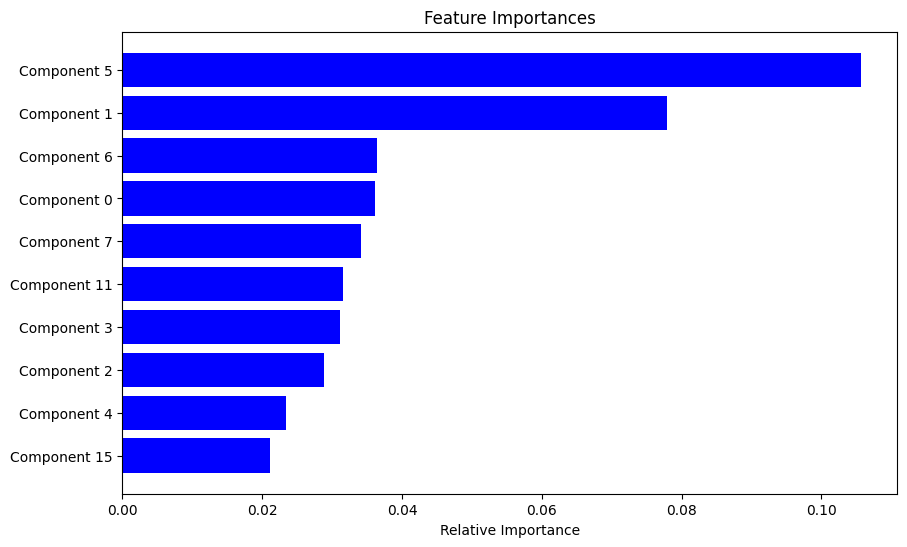

****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Control
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Obesity
Patient 10 is predicted to have: Obesity
Patient 11 is predicted to have: Control
Patient 12 is predicted to have: Control
Patient 13 is predicted to have: Obesity
Patient 14 is predicted to have: Control
Patient 15 is predicted to have: Control
Patient 16 is predicted to have: Control
Patient 17 is predicted to have: Control
Patient 18 is predicted to have: Control
Patient 19 is predicted to have: Control
Patient 20 is predicted to have: Control
Patient 21 is predicted to have: Control
Patient 22 is predicted to have: Control
Patien

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Apply PCA to reduce the number of features
pca = PCA(n_components=50, random_state=42)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize an XGBClassifier with hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train_pca, y_train_resampled)

# Best parameters from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters: ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_pca, y_train_resampled, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_pca, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_pca)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Feature importance
importance = best_xgb.feature_importances_
indices = np.argsort(importance)[-10:]

# Print the 10 most important features
print("Top 10 important features:")
for i in indices:
    print(f"Component {i}: {importance[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [f'Component {i}' for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Apply PCA to the new patient data
new_patient_pca = pca.transform(new_patient_scaled)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_pca)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_pca)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


tsne and xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Apply t-SNE to reduce the number of features
tsne = TSNE(n_components=2, random_state=42)  # Adjust the number of components as needed
X_train_tsne = tsne.fit_transform(X_train_resampled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

# Initialize an XGBClassifier with hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train_tsne, y_train_resampled)

# Best parameters from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("*" * 100)
print("Best parameters: ", best_xgb)
print("*" * 100)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_tsne, y_train_resampled, cv=cv, scoring='accuracy')
print("*" * 100)
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')
print("*" * 100)

# Train the model with the best parameters
best_xgb.fit(X_train_tsne, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_tsne)

print("*" * 100)
# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))
print("*" * 100)

# Feature importance is not relevant for t-SNE as it does not produce interpretable features

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Apply t-SNE to the new patient data
new_patient_tsne = tsne.fit_transform(new_patient_scaled)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_tsne)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

print("*" * 100)
# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_tsne)

print("*" * 100)
# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


****************************************************************************************************
Best parameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
****************************************************************************************************
*************************

C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sogeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

****************************************************************************************************
Patient 1 is predicted to have: Control
Patient 2 is predicted to have: Control
Patient 3 is predicted to have: Control
Patient 4 is predicted to have: Control
Patient 5 is predicted to have: Obesity
Patient 6 is predicted to have: Control
Patient 7 is predicted to have: Control
Patient 8 is predicted to have: Control
Patient 9 is predicted to have: Control
Patient 10 is predicted to have: Control
Patient 11 is predicted to have: Control
Patient 12 is predicted to have: Control
Patient 13 is predicted to have: Control
Patient 14 is predicted to have: Control
Patient 15 is predicted to have: Control
Patient 16 is predicted to have: Control
Patient 17 is predicted to have: Control
Patient 18 is predicted to have: Control
Patient 19 is predicted to have: Control
Patient 20 is predicted to have: Control
Patient 21 is predicted to have: Control
Patient 22 is predicted to have: Control
Patien

ADASYN for sampling, Random Forest for selecting the top 50 features, and hyperparameter tuning for XGBoost using GridSearchCV.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectFromModel

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train_encoded)

# Feature selection using RandomForest to select top 50 features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
selector = SelectFromModel(rf, max_features=50, prefit=True)
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# Initialize an XGBClassifier with hyperparameter tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train_selected, y_train_resampled)

# Best parameters from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_
print("Best parameters: ", best_xgb)

# Cross-validation scores for XGBoost
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(best_xgb, X_train_selected, y_train_resampled, cv=cv, scoring='accuracy')
print(f'XGBoost Cross-validation scores: {cv_scores_xgb}')
print(f'Average XGBoost Cross-validation score: {np.mean(cv_scores_xgb)}')

# Train the model with the best parameters
best_xgb.fit(X_train_selected, y_train_resampled)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate the XGBoost model
print(classification_report(y_test_encoded, y_pred_xgb, target_names=le.classes_))

# If needed, save the best model for future use
import joblib
joblib.dump(best_xgb, 'best_xgb_model.pkl')

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)

# Select features for new patient data
new_patient_selected = selector.transform(new_patient_scaled)

# Predict the disease for each new patient
new_patient_preds = best_xgb.predict(new_patient_selected)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Print the predicted disease for each new patient
for i, disease in enumerate(new_patient_diseases):
    print(f"Patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for each new patient
new_patient_probs = best_xgb.predict_proba(new_patient_selected)

# Print the probabilities of each disease for each new patient
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"Probabilities of each disease for Patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"{disease}: {prob:.2f}")
    print("*" * 100)


Best parameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
XGBoost Cross-validation scores: [0.84114583 0.90078329 0.84856397 0.845953   0.86684073]
Average XGBoost Cross-validation score: 0.8606573651000871
              precision    recall  f1-score   support

     Control    

[I 2024-07-24 08:30:45,720] A new study created in memory with name: no-name-751c056c-e513-4072-94ed-f3eb6a264232
[I 2024-07-24 08:56:36,317] Trial 0 finished with value: 0.847882609708336 and parameters: {'n_estimators': 118, 'max_depth': 6, 'learning_rate': 0.01120357560888098, 'subsample': 0.7297828750419935, 'colsample_bytree': 0.9327549629620895, 'reg_alpha': 0.28746791490065504, 'reg_lambda': 0.48615564138506084}. Best is trial 0 with value: 0.847882609708336.
[I 2024-07-24 09:45:00,694] Trial 1 finished with value: 0.9023334857359753 and parameters: {'n_estimators': 219, 'max_depth': 10, 'learning_rate': 0.10084799128513651, 'subsample': 0.8083938723452855, 'colsample_bytree': 0.8518653650325361, 'reg_alpha': 0.9104959476979796, 'reg_lambda': 0.6696050025307306}. Best is trial 1 with value: 0.9023334857359753.
[I 2024-07-24 10:02:44,642] Trial 2 finished with value: 0.8965131425712339 and parameters: {'n_estimators': 144, 'max_depth': 4, 'learning_rate': 0.2844942975926475, 'sub

Accuracy: 74.50%


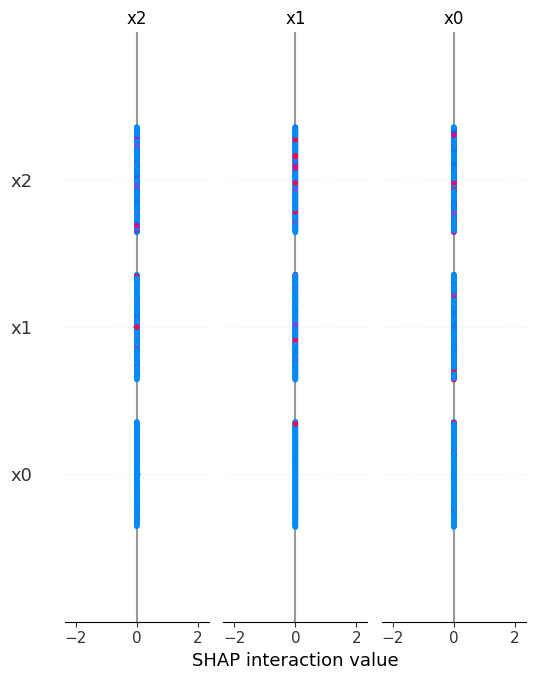

Blended Accuracy: 73.71%
****************************************************************************************************
              precision    recall  f1-score   support

     Control       0.68      0.48      0.57        85
     Obesity       0.76      0.88      0.81       161
         T2D       0.67      0.40      0.50         5

    accuracy                           0.74       251
   macro avg       0.70      0.59      0.63       251
weighted avg       0.73      0.74      0.72       251

****************************************************************************************************
****************************************************************************************************
The new patient is predicted to have: Control
Probabilities of each disease for the new patient :
Control: 0.99
Obesity: 0.00
T2D: 0.01
****************************************************************************************************


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import optuna
import shap

# Read the data from a single Excel file
df = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet2")

# Assuming the target column is named 'Disease'
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the sampling strategy as a dictionary
sampling_strategy = {0: 802, 1: 802, 2: 802}  # Assuming class 0 is majority, and classes 1 and 2 are minority

# Define SMOTE with the sampling strategy
over = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train_encoded)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Meta model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Hyperparameter tuning with Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss')
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    return cross_val_score(model, X_train_poly, y_train_smote, cv=kf, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_params = study.best_params

# Train final model with best parameters
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train_poly, y_train_smote)

# Evaluate model
y_pred = final_model.predict(X_test_poly)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Model Interpretation with SHAP
explainer = shap.Explainer(final_model)
shap_values = explainer.shap_values(X_test_poly)
shap.summary_plot(shap_values, X_test_poly, feature_names=poly.get_feature_names_out())

# Blending with weighted averaging
y_pred_rf = RandomForestClassifier(n_estimators=100).fit(X_train_poly, y_train_smote).predict_proba(X_test_poly)
y_pred_gb = GradientBoostingClassifier(n_estimators=100).fit(X_train_poly, y_train_smote).predict_proba(X_test_poly)
y_pred_xgb = final_model.predict_proba(X_test_poly)

# Weighted average
y_pred_blended = (y_pred_rf + y_pred_gb + y_pred_xgb) / 3
y_pred_final = np.argmax(y_pred_blended, axis=1)

accuracy_blended = accuracy_score(y_test_encoded, y_pred_final)
print(f'Blended Accuracy: {accuracy_blended * 100:.2f}%')

print("*" * 100)
# Evaluate the blended model
print(classification_report(y_test_encoded, y_pred_final, target_names=le.classes_))
print("*" * 100)

# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)
new_patient_poly = poly.transform(new_patient_scaled)

# Predict the disease for the new patient
new_patient_pred = final_model.predict(new_patient_poly)

# Decode the predicted class for the new patient
new_patient_disease = le.inverse_transform(new_patient_pred)

print("*" * 100)
# Print the predicted disease for the new patient
print(f"The new patient is predicted to have: {new_patient_disease[0]}")

# Predict the probabilities for the new patient
new_patient_prob = final_model.predict_proba(new_patient_poly)

# Map probabilities to class names
disease_probabilities = dict(zip(le.classes_, new_patient_prob[0]))

# Print the probabilities of each disease for the new patient
print("Probabilities of each disease for the new patient :")
for disease, prob in disease_probabilities.items():
    print(f"{disease}: {prob:.2f}")
print("*" * 100)


Class-Specific Metrics:

Control:

Precision (0.68): When the model predicts a patient has no disease (Control), it's correct 68% of the time.
Recall (0.48): The model is able to identify 48% of the actual no-disease cases.
F1-Score (0.57): This combines precision and recall into a single number. For Controls, it’s 0.57, which is a balance between precision and recall.
Obesity:

Precision (0.76): When the model predicts a patient has Obesity, it's correct 76% of the time.
Recall (0.88): The model successfully identifies 88% of the actual Obesity cases.
F1-Score (0.81): For Obesity, the model’s performance is well-balanced, with an F1-Score of 0.81.
T2D:

Precision (0.67): When the model predicts a patient has T2D, it’s correct 67% of the time.
Recall (0.40): The model can identify 40% of the actual T2D cases.
F1-Score (0.50): The balance between precision and recall for T2D cases is 0.50.


In [5]:
# New patient data (example)
new_patient_data = pd.read_excel("merged_genus_data.xlsx", sheet_name="Sheet6")

# Preprocess new patient data (fill NaNs with zero and scale)
new_patient_data.fillna(0, inplace=True)
new_patient_scaled = scaler.transform(new_patient_data)
new_patient_poly = poly.transform(new_patient_scaled)

# Predict the disease for the new patients
new_patient_preds = final_model.predict(new_patient_poly)

# Decode the predicted classes for the new patients
new_patient_diseases = le.inverse_transform(new_patient_preds)

# Print the predicted diseases for each new patient
print("*" * 100)
for i, disease in enumerate(new_patient_diseases):
    print(f"New patient {i+1} is predicted to have: {disease}")

# Predict the probabilities for the new patients
new_patient_probs = final_model.predict_proba(new_patient_poly)

# Print the probabilities of each disease for each new patient
print("Probabilities of each disease for the new patients:")
for i, probs in enumerate(new_patient_probs):
    disease_probabilities = dict(zip(le.classes_, probs))
    print(f"New patient {i+1}:")
    for disease, prob in disease_probabilities.items():
        print(f"  {disease}: {prob:.2f}")
print("*" * 100)

****************************************************************************************************
New patient 1 is predicted to have: Control
New patient 2 is predicted to have: Control
New patient 3 is predicted to have: Control
New patient 4 is predicted to have: Control
New patient 5 is predicted to have: Control
New patient 6 is predicted to have: Obesity
New patient 7 is predicted to have: Obesity
New patient 8 is predicted to have: Control
New patient 9 is predicted to have: Control
New patient 10 is predicted to have: Control
New patient 11 is predicted to have: Control
New patient 12 is predicted to have: Control
New patient 13 is predicted to have: Obesity
New patient 14 is predicted to have: Control
New patient 15 is predicted to have: Control
New patient 16 is predicted to have: Control
New patient 17 is predicted to have: Control
New patient 18 is predicted to have: Control
New patient 19 is predicted to have: Control
New patient 20 is predicted to have: Control
New pati